In [1]:
import pandas as pd

# Read the parquet file
file_path = r"C:\Users\sffra\Downloads\BSE 2025-2026\Ad_Campgain\message-campaign-engagement-analysis\sampling\data\combined_dataset.parquet"
df = pd.read_parquet(file_path)

# Basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

# Shape
print(f"\nShape: {df.shape}")
print(f"  - Rows: {df.shape[0]:,}")
print(f"  - Columns: {df.shape[1]}")

# Memory usage
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Shape: (1686884, 51)
  - Rows: 1,686,884
  - Columns: 51

Memory Usage: 1936.02 MB


In [2]:
print("\n" + "=" * 80)
print("ALL COLUMNS WITH DATA TYPES")
print("=" * 80)
print(f"\nTotal Columns: {len(df.columns)}\n")

for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
    non_null = df[col].notna().sum()
    null_count = df[col].isna().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"{i:3d}. {col:45s} | {str(dtype):15s} | Non-null: {non_null:>10,} ({100-null_pct:5.1f}%) | Null: {null_count:>8,}")


ALL COLUMNS WITH DATA TYPES

Total Columns: 51

  1. id                                            | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  2. message_id                                    | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  3. campaign_id                                   | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  4. message_type                                  | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  5. client_id                                     | int64           | Non-null:  1,686,884 (100.0%) | Null:        0
  6. channel_x                                     | object          | Non-null:  1,686,884 (100.0%) | Null:        0
  7. category                                      | object          | Non-null:          0 (  0.0%) | Null: 1,686,884
  8. platform                                      | object          | Non-null:    247,181 ( 14.7%) | Null: 1,439,703
  9. 

In [3]:
print("\n" + "=" * 80)
print("KEY COLUMN IDENTIFICATION")
print("=" * 80)

# Customer identifier
print("\n1. CUSTOMER IDENTIFIER:")
print(f"   - client_id (unique customers: {df['client_id'].nunique():,})")
print(f"   - Avg messages per customer: {len(df) / df['client_id'].nunique():.2f}")

# Channels
print("\n2. CHANNELS:")
print(f"   - channel_x: {df['channel_x'].unique()}")
print(f"   - channel_y: {df['channel_y'].unique()}")

# Message types
print("\n3. MESSAGE/CAMPAIGN TYPES:")
print(f"   - message_type: {df['message_type'].unique()}")
print(f"   - campaign_type: {df['campaign_type'].unique()}")

# Binary outcomes
print("\n4. BINARY OUTCOMES:")
print(f"   - is_opened:       {df['is_opened'].sum():,} ({df['is_opened'].mean()*100:.2f}%)")
print(f"   - is_clicked:      {df['is_clicked'].sum():,} ({df['is_clicked'].mean()*100:.2f}%)")
print(f"   - is_purchased:    {df['is_purchased'].sum():,} ({df['is_purchased'].mean()*100:.2f}%)")
print(f"   - is_unsubscribed: {df['is_unsubscribed'].sum():,} ({df['is_unsubscribed'].mean()*100:.2f}%)")

# Date range
print("\n5. TIME PERIOD:")
print(f"   - sent_at range: {df['sent_at'].min()} to {df['sent_at'].max()}")
print(f"   - Duration: {(df['sent_at'].max() - df['sent_at'].min()).days} days")


KEY COLUMN IDENTIFICATION

1. CUSTOMER IDENTIFIER:
   - client_id (unique customers: 40,101)
   - Avg messages per customer: 42.07

2. CHANNELS:
   - channel_x: ['mobile_push' 'email' 'sms' 'web_push']
   - channel_y: ['mobile_push' 'email' 'multichannel' 'sms']

3. MESSAGE/CAMPAIGN TYPES:
   - message_type: ['bulk' 'trigger' 'transactional']
   - campaign_type: ['bulk' 'trigger' 'transactional']

4. BINARY OUTCOMES:
   - is_opened:       315,943 (18.73%)
   - is_clicked:      17,865 (1.06%)
   - is_purchased:    616 (0.04%)
   - is_unsubscribed: 4,037 (0.24%)

5. TIME PERIOD:
   - sent_at range: 2021-04-30 05:00:38 to 2023-04-23 23:59:11
   - Duration: 723 days


NA at "sent_at" column 

In [9]:
print("\n" + "=" * 80)
print("INVESTIGATING MISSING sent_at VALUES")
print("=" * 80)

# Find rows with missing sent_at
missing_sent_at = df[df['sent_at'].isna()]

print(f"\nTotal records with missing sent_at: {len(missing_sent_at)}")
print(f"Percentage of dataset: {len(missing_sent_at)/len(df)*100:.3f}%")

# Check what these records look like
print("\n--- Characteristics of records with missing sent_at ---")

# Channel distribution
print("\nChannel distribution:")
print(missing_sent_at['channel_x'].value_counts())

# Message type distribution  
print("\nMessage type distribution:")
print(missing_sent_at['message_type'].value_counts())

# Campaign type distribution
print("\nCampaign type distribution:")
print(missing_sent_at['campaign_type'].value_counts())

# Check outcomes for these missing records
print("\n--- Outcomes for missing sent_at records ---")
print(f"is_opened:       {missing_sent_at['is_opened'].sum()} ({missing_sent_at['is_opened'].mean()*100:.2f}%)")
print(f"is_clicked:      {missing_sent_at['is_clicked'].sum()} ({missing_sent_at['is_clicked'].mean()*100:.2f}%)")
print(f"is_purchased:    {missing_sent_at['is_purchased'].sum()} ({missing_sent_at['is_purchased'].mean()*100:.2f}%)")

# Check other date fields
print("\n--- Other date fields for these records ---")
print(f"created_at populated: {missing_sent_at['created_at'].notna().sum()}")
print(f"updated_at populated: {missing_sent_at['updated_at'].notna().sum()}")
print(f"date field populated: {missing_sent_at['date'].notna().sum()}")

# Show a few sample records
print("\n--- Sample of records with missing sent_at (first 5) ---")
print(missing_sent_at[['id', 'client_id', 'channel_x', 'message_type', 'sent_at', 'date', 'created_at', 'is_opened', 'is_clicked']].head())


INVESTIGATING MISSING sent_at VALUES

Total records with missing sent_at: 419
Percentage of dataset: 0.025%

--- Characteristics of records with missing sent_at ---

Channel distribution:
channel_x
email          374
mobile_push     45
Name: count, dtype: int64

Message type distribution:
message_type
bulk             261
trigger          128
transactional     30
Name: count, dtype: int64

Campaign type distribution:
campaign_type
bulk             261
trigger          128
transactional     30
Name: count, dtype: int64

--- Outcomes for missing sent_at records ---
is_opened:       357 (85.20%)
is_clicked:      38 (9.07%)
is_purchased:    0 (0.00%)

--- Other date fields for these records ---
created_at populated: 419
updated_at populated: 419
date field populated: 0

--- Sample of records with missing sent_at (first 5) ---
            id            client_id channel_x   message_type sent_at  date  \
5613   3534876  1515915625582038728     email  transactional     NaT  None   
8585  180

TEMPORAL DISTRIBUTION OF EVENTS

In [10]:
print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Messages by month
print("\nMessages sent by month:")
monthly_counts = df['sent_month'].value_counts().sort_index()
print(monthly_counts.head(10))
print("...")
print(monthly_counts.tail(10))

# Messages by day of week (filter out NaN)
print("\nMessages by day of week:")
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
for day, count in dow_counts.items():
    day_int = int(day)  # Convert to int to use as index
    print(f"  {dow_names[day_int]:10s}: {count:,} ({count/len(df)*100:.1f}%)")

# Messages by hour
print("\nTop 10 hours for sending messages:")
hour_counts = df['sent_hour'].value_counts().sort_index()
print(hour_counts.head(10))


TEMPORAL PATTERNS

Messages sent by month:
sent_month
2021-04     5156
2021-05    17497
2021-06    10117
2021-07    21107
2021-08    21082
2021-09    16621
2021-10    33992
2021-11    43393
2021-12    56731
2022-01    76977
Freq: M, Name: count, dtype: int64
...
sent_month
2022-07     82432
2022-08     71738
2022-09     68418
2022-10    113183
2022-11    119377
2022-12    171942
2023-01    121346
2023-02     93835
2023-03    112289
2023-04     57147
Freq: M, Name: count, dtype: int64

Messages by day of week:
  Monday    : 239,450 (14.2%)
  Tuesday   : 259,792 (15.4%)
  Wednesday : 449,895 (26.7%)
  Thursday  : 148,994 (8.8%)
  Friday    : 490,391 (29.1%)
  Saturday  : 67,601 (4.0%)
  Sunday    : 30,342 (1.8%)

Top 10 hours for sending messages:
sent_hour
0.0      4961
1.0      2599
2.0      2075
3.0      4796
4.0      3282
5.0      8278
6.0     74376
7.0    256225
8.0    221130
9.0    165586
Name: count, dtype: int64


Viz for temporal patterns


TEMPORAL PATTERNS

✓ Plot saved as 'temporal_patterns.png'


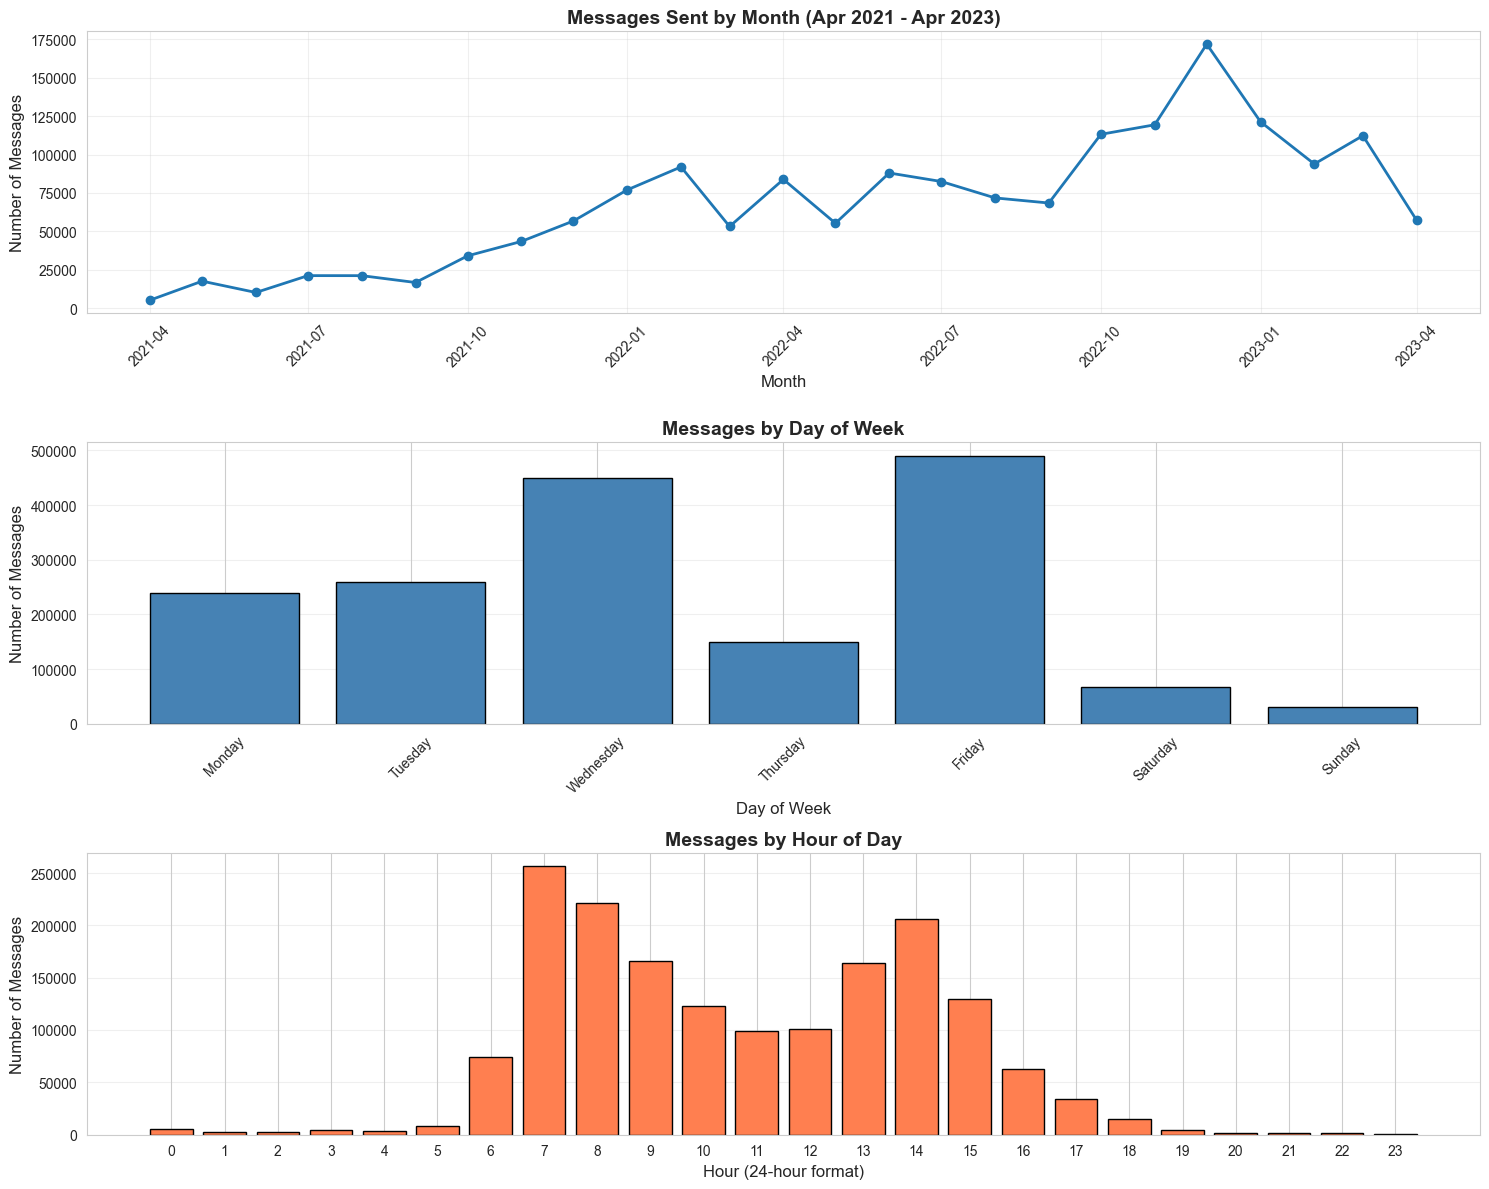

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Messages by month (time series)
monthly_counts = df['sent_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert Period to timestamp for plotting
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Messages Sent by Month (Apr 2021 - Apr 2023)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Messages', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Messages by day of week
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black')
axes[1].set_title('Messages by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Number of Messages', fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Messages by hour
hour_counts = df['sent_hour'].dropna().value_counts().sort_index()
axes[2].bar(hour_counts.index, hour_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Messages by Hour of Day', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour (24-hour format)', fontsize=12)
axes[2].set_ylabel('Number of Messages', fontsize=12)
axes[2].set_xticks(range(0, 24))
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'temporal_patterns.png'")
plt.show()


In [12]:

# Print summary stats
# Print summary stats
print("\nSummary Statistics:")
print(f"Most active month: {monthly_counts.idxmax()} with {monthly_counts.max():,} messages")
print(f"Most active day: {dow_names[int(dow_counts.idxmax())]} with {dow_counts.max():,} messages")
print(f"Most active hour: {int(hour_counts.idxmax())}:00 with {hour_counts.max():,} messages")


Summary Statistics:
Most active month: 2022-12-01 00:00:00 with 171,942 messages
Most active day: Friday with 490,391 messages
Most active hour: 7:00 with 256,225 messages


Looking at open, click and purchase rates (for all) by:
-Month/Year
-Month (unique)
-Day of Week
-Hour

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TIME TRENDS ANALYSIS")
print("=" * 80)

# Ensure datetime column exists
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# Monthly aggregation
print("Calculating monthly metrics...")
monthly = df.groupby(df['sent_datetime'].dt.to_period('M')).agg({
    'client_id': 'count',  # total messages
    'is_opened': ['sum', 'mean'],
    'is_clicked': ['sum', 'mean'],
    'is_purchased': ['sum', 'mean']
}).round(4)

monthly.columns = ['total_messages', 'opens', 'open_rate', 'clicks', 'click_rate', 
                   'purchases', 'purchase_rate']
monthly = monthly.reset_index()
monthly['sent_datetime'] = monthly['sent_datetime'].dt.to_timestamp()
monthly['open_rate'] *= 100
monthly['click_rate'] *= 100
monthly['purchase_rate'] *= 100

# Calculate CTOR (Click-to-Open Rate)
monthly['ctor'] = (monthly['clicks'] / monthly['opens'] * 100).round(2)

# Create clean 4-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 13))
fig.suptitle('Engagement Metrics Over Time (Apr 2021 - Apr 2023)', 
             fontsize=16, fontweight='bold')

# Define metrics
metrics = [
    ('open_rate', 'Open Rate (%)', 'total_messages', 'Messages Sent', 'steelblue'),
    ('click_rate', 'Click Rate (%)', 'total_messages', 'Messages Sent', 'coral'),
    ('purchase_rate', 'Purchase Rate (%)', 'total_messages', 'Messages Sent', 'green'),
    ('ctor', 'Click-to-Open Rate (%)', 'opens', 'Total Opens', 'purple')
]

for idx, (metric, label, volume_col, volume_label, color) in enumerate(metrics):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Rate line (left axis)
    line = ax.plot(monthly['sent_datetime'], monthly[metric], 
                   marker='o', linewidth=2.5, markersize=5, color=color, 
                   label=label, zorder=3)
    ax.set_ylabel(label, color=color, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Volume bars (right axis)
    bars = ax2.bar(monthly['sent_datetime'], monthly[volume_col], 
                   alpha=0.15, color='gray', width=20, zorder=2)
    ax2.set_ylabel(volume_label, color='gray', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Add mean line
    mean_val = monthly[metric].mean()
    ax.axhline(y=mean_val, color=color, linestyle='--', alpha=0.4, linewidth=1.5)
    ax.text(monthly['sent_datetime'].iloc[-1], mean_val, 
            f' avg: {mean_val:.2f}%', va='center', fontsize=9, color=color)
    
    if idx == 3:
        ax.set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.savefig('time_trends_clean.png', dpi=150, bbox_inches='tight')
print("✓ Saved: time_trends_clean.png")
plt.close()

# Summary statistics
print("\n" + "=" * 80)
print("KEY TAKEAWAYS")
print("=" * 80)

print(f"\nOverall Period: {monthly['sent_datetime'].min().strftime('%b %Y')} to {monthly['sent_datetime'].max().strftime('%b %Y')}")
print(f"Total Messages: {monthly['total_messages'].sum():,}")
print(f"Avg Messages/Month: {monthly['total_messages'].mean():,.0f}")

print("\nAverage Engagement Rates:")
print(f"  Open Rate:           {monthly['open_rate'].mean():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].mean():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].mean():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].mean():.2f}%")

print("\nStability (Coefficient of Variation):")
print(f"  Open Rate:           {(monthly['open_rate'].std() / monthly['open_rate'].mean()):.2f}")
print(f"  Click Rate:          {(monthly['click_rate'].std() / monthly['click_rate'].mean()):.2f}")
print(f"  Purchase Rate:       {(monthly['purchase_rate'].std() / monthly['purchase_rate'].mean()):.2f}")
print(f"  Click-to-Open Rate:  {(monthly['ctor'].std() / monthly['ctor'].mean()):.2f}")

print("\nMonthly Range:")
print(f"  Open Rate:           {monthly['open_rate'].min():.2f}% to {monthly['open_rate'].max():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].min():.2f}% to {monthly['click_rate'].max():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].min():.2f}% to {monthly['purchase_rate'].max():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].min():.2f}% to {monthly['ctor'].max():.2f}%")

print("\nKey Insights:")
print(f"  → {monthly['opens'].sum():,} messages opened ({monthly['open_rate'].mean():.1f}% of sent)")
print(f"  → {monthly['clicks'].sum():,} clicks ({monthly['click_rate'].mean():.2f}% of sent, {monthly['ctor'].mean():.1f}% of opens)")
print(f"  → {monthly['purchases'].sum():,} purchases ({monthly['purchase_rate'].mean():.3f}% of sent)")

# Export summary table
monthly_export = monthly[['sent_datetime', 'total_messages', 'opens', 'clicks',
                          'open_rate', 'click_rate', 'purchase_rate', 'ctor']].copy()
monthly_export['sent_datetime'] = monthly_export['sent_datetime'].dt.strftime('%Y-%m')
monthly_export.columns = ['Month', 'Messages', 'Opens', 'Clicks', 
                          'Open_Rate_%', 'Click_Rate_%', 'Purchase_Rate_%', 'CTOR_%']
monthly_export.to_csv('monthly_engagement_summary.csv', index=False)
print("\n✓ Saved: monthly_engagement_summary.csv")


TIME TRENDS ANALYSIS
Calculating monthly metrics...
✓ Saved: time_trends_clean.png

KEY TAKEAWAYS

Overall Period: Apr 2021 to Apr 2023
Total Messages: 1,686,465
Avg Messages/Month: 67,459

Average Engagement Rates:
  Open Rate:           18.07%
  Click Rate:          1.47%
  Purchase Rate:       0.07%
  Click-to-Open Rate:  8.70%

Stability (Coefficient of Variation):
  Open Rate:           0.23
  Click Rate:          0.70
  Purchase Rate:       1.15
  Click-to-Open Rate:  0.74

Monthly Range:
  Open Rate:           8.21% to 23.78%
  Click Rate:          0.19% to 3.88%
  Purchase Rate:       0.00% to 0.29%
  Click-to-Open Rate:  1.45% to 22.17%

Key Insights:
  → 315,586 messages opened (18.1% of sent)
  → 17,827 clicks (1.47% of sent, 8.7% of opens)
  → 616 purchases (0.066% of sent)

✓ Saved: monthly_engagement_summary.csv


Find the counts of when a user first clicked by hour, day, month

Context:

In [27]:
df['sent_at'] = pd.to_datetime(df['sent_at'])
df['day_of_week'] = df['sent_at'].dt.day_name()
df['hour_of_day'] = df['sent_at'].dt.hour

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\2054760384.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_of_week')


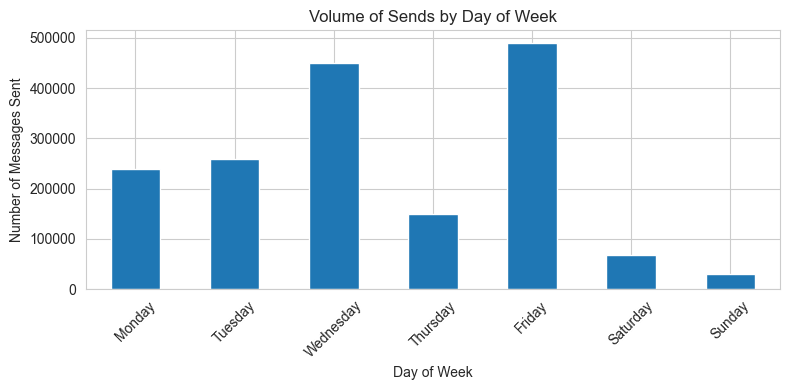

In [29]:
# counts of messages sent per day
sent_by_day = (
    df.groupby('day_of_week')
      .size()
      .rename('n_sent')
)

plt.figure(figsize=(8, 4))
sent_by_day.plot(kind='bar')
plt.ylabel('Number of Messages Sent')
plt.xlabel('Day of Week')
plt.title('Volume of Sends by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



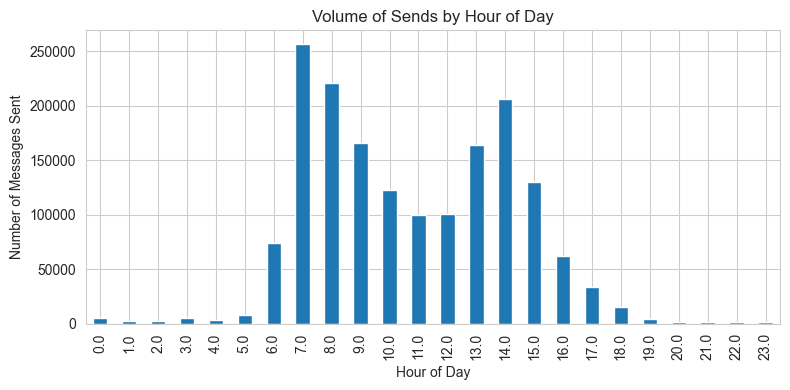

In [30]:
sent_by_hour = (
    df.groupby('hour_of_day')
      .size()
      .rename('n_sent')
      .sort_index()
)

plt.figure(figsize=(8, 4))
sent_by_hour.plot(kind='bar')   # or kind='line'
plt.ylabel('Number of Messages Sent')
plt.xlabel('Hour of Day')
plt.title('Volume of Sends by Hour of Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\2062681078.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub.groupby(['day_of_week', 'hour_of_day'])['is_clicked']


   day_of_week  hour_of_day  click_rate      n
54   Wednesday          6.0    0.013138  13777
55   Wednesday          7.0    0.013021  77104
56   Wednesday          8.0    0.011962  75823
57   Wednesday          9.0    0.012899  47756
58   Wednesday         10.0    0.009102  32300


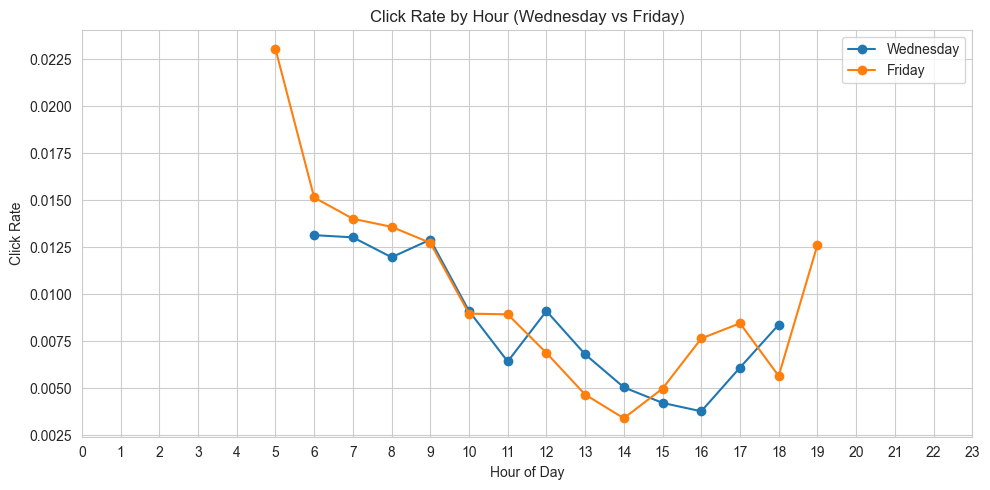

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# assume you already did:
# df['sent_at'] = pd.to_datetime(df['sent_at'])
# df['day_of_week'] = df['sent_at'].dt.day_name()
# df['hour_of_day'] = df['sent_at'].dt.hour

# 1. Keep only Wednesday and Friday
sub = df[df['day_of_week'].isin(['Wednesday', 'Friday'])].copy()

# 2. Click rate by hour *for each of those days*
hour_stats = (
    sub.groupby(['day_of_week', 'hour_of_day'])['is_clicked']
       .agg(click_rate='mean', n='size')
       .reset_index()
)

# (optional) drop very low-volume hour bins
MIN_N = 1000
hour_stats = hour_stats[hour_stats['n'] >= MIN_N]

print(hour_stats.head())

plt.figure(figsize=(10, 5))

for day in ['Wednesday', 'Friday']:
    tmp = hour_stats[hour_stats['day_of_week'] == day]
    plt.plot(tmp['hour_of_day'], tmp['click_rate'], marker='o', label=day)

plt.xlabel('Hour of Day')
plt.ylabel('Click Rate')
plt.title('Click Rate by Hour (Wednesday vs Friday)')
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()



In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure both columns are datetime
df['sent_at'] = pd.to_datetime(df['sent_at'])
df['clicked_first_time_at'] = pd.to_datetime(df['clicked_first_time_at'])

# 2. Keep only rows that actually clicked and have a click time
clicked = df[(df['is_clicked']) & df['clicked_first_time_at'].notna()].copy()

# 3. Compute time to click
clicked['time_to_click'] = clicked['clicked_first_time_at'] - clicked['sent_at']

# (optional) drop any weird negative values
clicked = clicked[clicked['time_to_click'] >= pd.Timedelta(0)]

# 4. Convert to a convenient unit (e.g. hours)
clicked['time_to_click_hours'] = clicked['time_to_click'].dt.total_seconds() / 3600.0


In [40]:
print(clicked['time_to_click_hours'].describe())


count    17826.000000
mean        21.654862
std        137.232079
min          0.000000
25%          0.256667
50%          1.991944
75%         12.567917
max       8529.672500
Name: time_to_click_hours, dtype: float64


In [41]:
for h in [0.25, 1, 6, 24, 72, 168]:  # 15m, 1h, 6h, 1d, 3d, 7d
    share = (clicked['time_to_click_hours'] <= h).mean()
    print(f"Share of clicks within {h} hours: {share:.2%}")


Share of clicks within 0.25 hours: 24.76%
Share of clicks within 1 hours: 40.82%
Share of clicks within 6 hours: 65.37%
Share of clicks within 24 hours: 83.79%
Share of clicks within 72 hours: 94.28%
Share of clicks within 168 hours: 98.20%


Relevant to fatigue: number of messages in last 7, 14, 30 days for those that unsubscribed

In [53]:
# all clients that have at least one unsubscribe event
unsub_client_ids = df.loc[df["is_unsubscribed"], "client_id"].unique()

cols = ["id", "client_id", "sent_at", "is_unsubscribed", "unsubscribed_at"]

df_small = df.loc[df["client_id"].isin(unsub_client_ids), cols].copy()

# drop rows without sent_at (can't do time-based rolling without a timestamp)
df_small = df_small[df_small["sent_at"].notna()]

# sort by client and time
df_small = df_small.sort_values(["client_id", "sent_at"])

def add_message_counts(g):
    # ensure sorted
    g = g.sort_values("sent_at").copy()
    
    # set sent_at as index to use time-based rolling
    g = g.set_index("sent_at")
    
    # count messages in last 7 / 30 days (including current message)
    g["msgs_last_7d"] = g["id"].rolling("7D").count()
    g["msgs_last_30d"] = g["id"].rolling("30D").count()
    
    # restore sent_at as column
    return g.reset_index()

df_small = df_small.groupby("client_id", group_keys=False).apply(add_message_counts)


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\2690008229.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_small = df_small.groupby("client_id", group_keys=False).apply(add_message_counts)


In [54]:
# only the actual unsubscribe events
df_unsub = df_small[df_small["is_unsubscribed"]].copy()

avg_7d  = df_unsub["msgs_last_7d"].mean()
avg_30d = df_unsub["msgs_last_30d"].mean()

print("Average msgs in last 7 days before unsubscribe:", avg_7d)
print("Average msgs in last 30 days before unsubscribe:", avg_30d)


Average msgs in last 7 days before unsubscribe: 1.9084121453459433
Average msgs in last 30 days before unsubscribe: 4.311846689895471


In [56]:
import pandas as pd

# Start from all messages with a valid timestamp
df_all = df.loc[df["sent_at"].notna(), ["client_id", "sent_at", "id"]].copy()
df_all = df_all.sort_values(["client_id", "sent_at"])

def get_counts(g):
    # g is all messages for one client
    g = g.sort_values("sent_at").set_index("sent_at")
    
    out = pd.DataFrame(index=g.index)
    out["msgs_last_7d"] = g["id"].rolling("7D").count()
    out["msgs_last_30d"] = g["id"].rolling("30D").count()
    return out

# all_counts index: sent_at (per message), plus implicit client grouping
all_counts = (
    df_all
    .groupby("client_id", group_keys=False)
    .apply(get_counts)
)

# Just to be safe, drop any NaNs (e.g. very first message with incomplete window)
all_counts = all_counts.dropna(subset=["msgs_last_7d", "msgs_last_30d"])


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\4123198062.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_counts)


In [58]:
# At unsubscribe moment
df_unsub = df_small[df_small["is_unsubscribed"]].copy()

unsub_avg_7d  = df_unsub["msgs_last_7d"].mean()
unsub_avg_30d = df_unsub["msgs_last_30d"].mean()

overall_avg_7d  = all_counts["msgs_last_7d"].mean()
overall_avg_30d = all_counts["msgs_last_30d"].mean()

# counts (how many points go into each mean)
unsub_count_7d  = df_unsub["msgs_last_7d"].notna().sum()
unsub_count_30d = df_unsub["msgs_last_30d"].notna().sum()

overall_count_7d  = all_counts["msgs_last_7d"].notna().sum()
overall_count_30d = all_counts["msgs_last_30d"].notna().sum()

print("UNSUB cohort @ unsubscribe:")
print(f"  mean msgs last 7d : {unsub_avg_7d:.3f}  (n = {unsub_count_7d})")
print(f"  mean msgs last 30d: {unsub_avg_30d:.3f}  (n = {unsub_count_30d})")

print("\nALL messages (baseline):")
print(f"  mean msgs last 7d : {overall_avg_7d:.3f}  (n = {overall_count_7d})")
print(f"  mean msgs last 30d: {overall_avg_30d:.3f}  (n = {overall_count_30d})")



UNSUB cohort @ unsubscribe:
  mean msgs last 7d : 1.908  (n = 4018)
  mean msgs last 30d: 4.312  (n = 4018)

ALL messages (baseline):
  mean msgs last 7d : 3.127  (n = 1686465)
  mean msgs last 30d: 9.749  (n = 1686465)


In [59]:
import pandas as pd

# Use all messages that have a sent timestamp
df_all = df.loc[df["sent_at"].notna(), ["id", "client_id", "sent_at", "is_opened"]].copy()
df_all = df_all.sort_values(["client_id", "sent_at"])

def add_exposure(g):
    # g: all messages for one client
    g = g.sort_values("sent_at").set_index("sent_at")
    
    # rolling counts of messages for this client at SEND time
    g["msgs_last_7d"] = g["id"].rolling("7D").count()
    g["msgs_last_30d"] = g["id"].rolling("30D").count()
    
    return g.reset_index()  # put sent_at back as a column

df_exp = df_all.groupby("client_id", group_keys=False).apply(add_exposure)


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\44624847.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_exp = df_all.groupby("client_id", group_keys=False).apply(add_exposure)


In [60]:
# 7-day exposure bins
bins_7 = [0, 1, 3, 5, 10, 20, 1_000]   # adjust if you like
labels_7 = ["0–1", "2–3", "4–5", "6–10", "11–20", "21+"]

df_exp["bin_7d"] = pd.cut(
    df_exp["msgs_last_7d"],
    bins=bins_7,
    labels=labels_7,
    include_lowest=True,
    right=True,
)

open_by_7 = (
    df_exp
    .groupby("bin_7d")
    .agg(
        n_messages=("id", "size"),
        n_open=("is_opened", "sum"),
        open_rate=("is_opened", "mean"),
    )
)

print("Open rate by messages in last 7 days:")
print(open_by_7)


Open rate by messages in last 7 days:
        n_messages  n_open  open_rate
bin_7d                               
0–1         352819   52431   0.148606
2–3         865078  145582   0.168288
4–5         322561   77313   0.239685
6–10        113778   30671   0.269569
11–20        23681    7155   0.302141
21+           8548    2434   0.284745


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\273216572.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("bin_7d")


In [61]:
# 30-day exposure bins
bins_30 = [0, 5, 10, 20, 40, 80, 10_000]
labels_30 = ["0–5", "6–10", "11–20", "21–40", "41–80", "81+"]

df_exp["bin_30d"] = pd.cut(
    df_exp["msgs_last_30d"],
    bins=bins_30,
    labels=labels_30,
    include_lowest=True,
    right=True,
)

open_by_30 = (
    df_exp
    .groupby("bin_30d")
    .agg(
        n_messages=("id", "size"),
        n_open=("is_opened", "sum"),
        open_rate=("is_opened", "mean"),
    )
)

print("\nOpen rate by messages in last 30 days:")
print(open_by_30)



Open rate by messages in last 30 days:
         n_messages  n_open  open_rate
bin_30d                               
0–5          483793   66992   0.138472
6–10         653182  109171   0.167137
11–20        443652  111250   0.250760
21–40         89012   23454   0.263493
41–80         13056    3686   0.282322
81+            3770    1033   0.274005


C:\Users\sffra\AppData\Local\Temp\ipykernel_22488\268305749.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("bin_30d")
